## Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goal :
     
X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br><br>

### Goal of the Case Study is :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


### Importing Libraries

In [1]:
# reading and manipulating data
import pandas as pd                                 

# Numerical calculations
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor

# ignore unnecessaru warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data dict
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', index_col=1, header=2)
data_dict.drop(columns = 'Unnamed: 0', inplace=True)
with pd.option_context('display.max_colwidth', None):
  display(data_dict)

,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


In [3]:
# reading actual data
df = pd.read_csv('Leads.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# data info (shape, null count, data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Statistical description of data
df.iloc[:, 2:].describe(include = 'all')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,5,21,2,2,NaN,NaN,NaN,NaN,17,38,...,1,6,7,3,3,NaN,NaN,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


Searching whether there are duplicate records.

In [6]:
df['Prospect ID'][df['Prospect ID'].duplicated() == True]

Series([], Name: Prospect ID, dtype: object)

In [7]:
df['Lead Number'][df['Lead Number'].duplicated() == True]

Series([], Name: Lead Number, dtype: int64)

Well, it's evident that there are none duplicate records.

### Data Cleaning & Preparation

In [8]:
# Percentage of null values
round((df.isnull().sum()/len(df))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columns with null values higher than 30%
df = df[df.columns[df.isnull().sum()/len(df)*100 < 30]]

In [10]:
# Checking the percentage of null values of the remaining columns
round(df.isnull().sum()/len(df)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Now there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [11]:
# Unique value counts of each column
for c in df.iloc[:, 2:].columns:
    print(df[c].value_counts(),'\n\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64 


No     8506
Yes     734
Name: Do Not Email, dtype: int64 


No     9238
Yes       2
Name: Do Not Call, dtype: int64 


0    5679
1    3561
Name: Converted, dtype: int64 


0.0      2189
2.0      1680
3.0      1306
4.0      1

In [16]:
df.shape

(9240, 31)

- The columns having 'Select' which can be dropped are :
    - `How did you hear about X Education`, `Lead Profile`.
- Also notice that you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.
- As you might be able to interpret, the variable `Country` & `City` won't be of any use in our analysis. So it's best that we drop it.

In [17]:
# Dropping columns based on above decisions
df.drop(['Do Not Call', 'What matters most to you in choosing a course', 'How did you hear about X Education',
         'Search', 'Magazine', 'Newspaper Article','X Education Forums', 'Newspaper',
         'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
         'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
         'Lead Profile', 'Country', 'City'], axis=1, inplace = True)

In [18]:
# Checking the remaining columns null values percentage
df.isnull().sum()/len(df)*100

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [19]:
# Replacing the columns with 2 unique values i.e 'Yes', 'No' with 1 & 0 repectively
df.replace({'Yes':1, 'No':0}, inplace=True)

In [20]:
# Checking the variables with binary values
df[df.columns[df.nunique() == 2]].head()

,Do Not Email,Converted,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,1,1
3,0,0,0
4,0,1,0


In [21]:
# Drop the null values rows in the column 'Specialization'
df.drop(df.loc[df['Specialization']=='Select'].index, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7298 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             7298 non-null   object 
 1   Lead Number                             7298 non-null   int64  
 2   Lead Origin                             7298 non-null   object 
 3   Lead Source                             7290 non-null   object 
 4   Do Not Email                            7298 non-null   int64  
 5   Converted                               7298 non-null   int64  
 6   TotalVisits                             7230 non-null   float64
 7   Total Time Spent on Website             7298 non-null   int64  
 8   Page Views Per Visit                    7230 non-null   float64
 9   Last Activity                           7249 non-null   object 
 10  Specialization                          5860 non-null   obje

##### Treating null values in Occupation, TotalVisits, Page Views Per Visit,  Last Activity variable
Occupation being categorical variable, we'll be identifying the mode and then imputing null values with it.

In [23]:
# Looking at the value counts
df['What is your current occupation'].value_counts()

Unemployed              3772
Working Professional     679
Student                  138
Other                     15
Housewife                 10
Businessman                7
Name: What is your current occupation, dtype: int64

In [24]:
# Imputing null values in 'what is your occupation' with mode i.e 'Unemployed'
df['What is your current occupation'].fillna('Unemployed', inplace=True)

##### Checking the central tendencies of  TotalVisits, Page Views Per Visit, Last Activity 

In [25]:
df.TotalVisits.mode()[0]

2.0

In [26]:
df['Page Views Per Visit'].median(), df['Page Views Per Visit'].mean(), df['Page Views Per Visit'].mode()

(2.0,
 2.6247067773167356,
 0    2.0
 dtype: float64)

In [27]:
df['Last Activity'].mode()[0]

'Email Opened'

In [28]:
# Based on above statistics filling null values as below
df['Page Views Per Visit'].fillna(df.TotalVisits.mode()[0], inplace = True)
df['TotalVisits'].fillna(df.TotalVisits.mode()[0], inplace = True)
df['Last Activity'].fillna(df.TotalVisits.mode()[0], inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7298 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             7298 non-null   object 
 1   Lead Number                             7298 non-null   int64  
 2   Lead Origin                             7298 non-null   object 
 3   Lead Source                             7290 non-null   object 
 4   Do Not Email                            7298 non-null   int64  
 5   Converted                               7298 non-null   int64  
 6   TotalVisits                             7298 non-null   float64
 7   Total Time Spent on Website             7298 non-null   int64  
 8   Page Views Per Visit                    7298 non-null   float64
 9   Last Activity                           7298 non-null   object 
 10  Specialization                          5860 non-null   obje

##### Dropping remaining rows with null values

In [30]:
df.dropna(inplace = True)

---

### Outlier Treatment

In [31]:
df.iloc[:, 2:].describe([.1, .25, .5, .75, .85, .95, .99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000
mean,0.086979,0.441558,4.358681,607.647471,3.016552,0.492481
std,0.281828,0.496615,5.340374,555.785371,2.095922,0.499986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,134.000000,2.000000,0.000000
50%,0.000000,0.000000,4.000000,370.000000,3.000000,0.000000
75%,0.000000,1.000000,5.000000,1088.250000,4.000000,1.000000
85%,0.000000,1.000000,7.000000,1325.000000,5.000000,1.000000
95%,1.000000,1.000000,11.000000,1613.450000,7.000000,1.000000


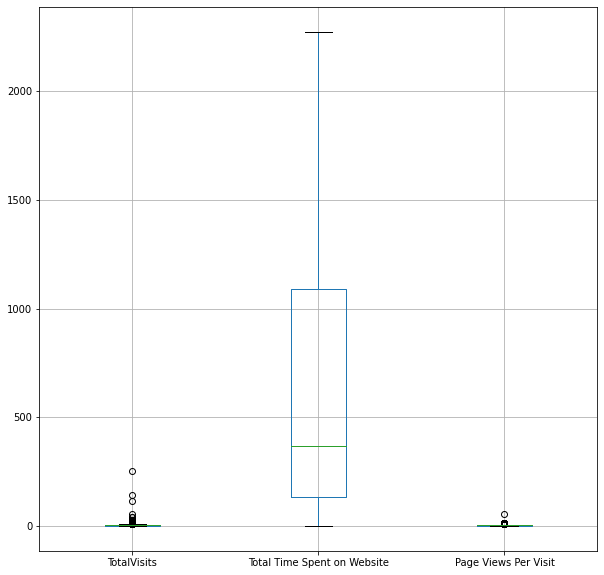

In [32]:
df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].boxplot(figsize=(10, 10))
plt.show()

In [33]:
IQR = df.TotalVisits.quantile(0.99) - df.TotalVisits.quantile(0.1)
Q1 = df.TotalVisits.quantile(0.1)
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits > Q1 - 1.5*IQR) & (df.TotalVisits < Q3 + 1.5*IQR)]

In [34]:
IQR = df['Page Views Per Visit'].quantile(0.99) - df['Page Views Per Visit'].quantile(0.1)
Q1 = df['Page Views Per Visit'].quantile(0.1)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit'] > Q1 - 1.5*IQR) & (df['Page Views Per Visit'] < Q3 + 1.5*IQR)]

In [35]:
df[df.columns[df.dtypes == 'float64']]

,TotalVisits,Page Views Per Visit
2,2.0,2.00
3,1.0,1.00
6,2.0,2.00
8,2.0,2.00
9,4.0,4.00
...,...,...
9235,8.0,2.67
9236,2.0,2.00
9237,2.0,2.00
9238,3.0,3.00


In [36]:
df['TotalVisits'] = df.TotalVisits.astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5848 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5848 non-null   object 
 1   Lead Number                             5848 non-null   int64  
 2   Lead Origin                             5848 non-null   object 
 3   Lead Source                             5848 non-null   object 
 4   Do Not Email                            5848 non-null   int64  
 5   Converted                               5848 non-null   int64  
 6   TotalVisits                             5848 non-null   int64  
 7   Total Time Spent on Website             5848 non-null   int64  
 8   Page Views Per Visit                    5848 non-null   float64
 9   Last Activity                           5848 non-null   object 
 10  Specialization                          5848 non-null   obje

---

## EDA

In [38]:
df.columns[df.dtypes == 'object']

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],
      dtype='object')

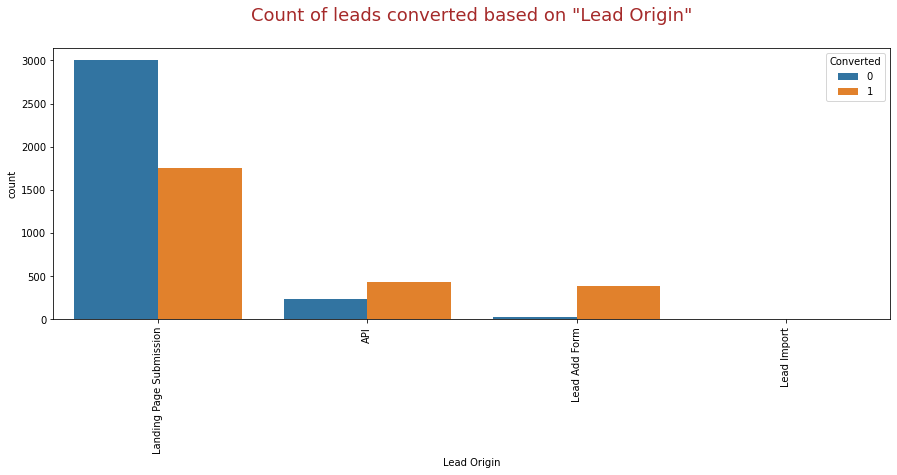

In [40]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Count of leads converted based on "Lead Origin"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
plt.show()

Inference:
- Most of the leads identified are from`Landing page submission`.
- Leads identified from `API`, `Lead Add Form` has high conversion rate.
- There are no leads identified from `Lead Import`.

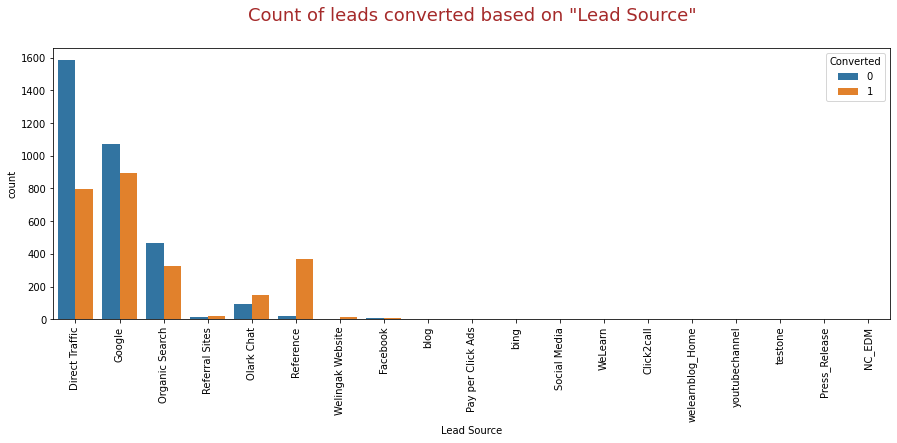

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Count of leads converted based on "Lead Source"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
plt.legend(loc='upper right', title='Converted')
plt.show()

Inference:
- Highest leads are obtained from `Direct Traffic` & `Google`.
- Leads obtained from `Reference` has highest conversion rate.

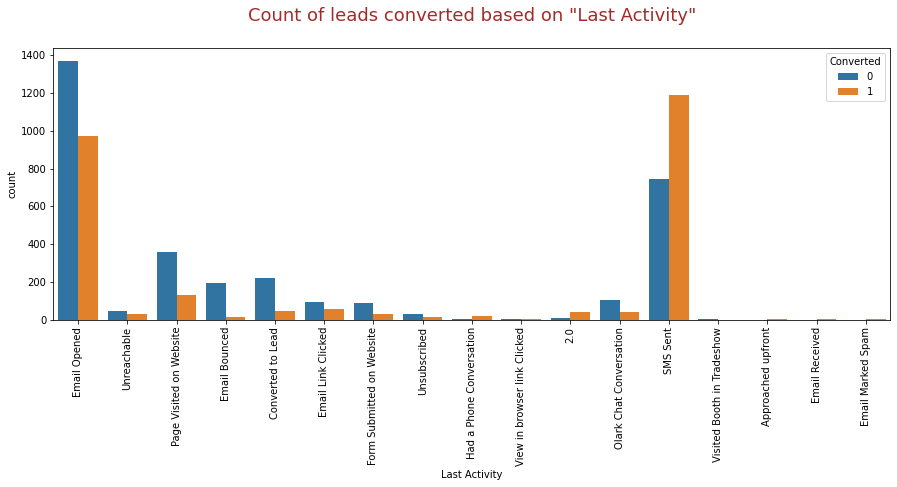

In [42]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Activity'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Count of leads converted based on "Last Activity"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
plt.legend(loc='upper right', title='Converted')
plt.show()

Inference:
- It's seen that `Email Opened` & `SMS Sent` are most performed last activities.
- `SMS Sent` has highest conversion rate.


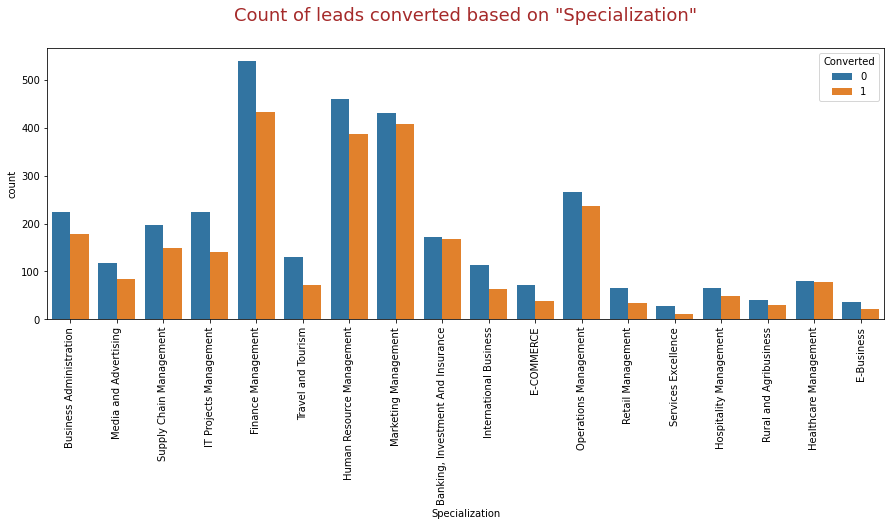

In [43]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Specialization'], hue=df.Converted)
plt.title('Count of leads converted based on "Specialization"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

Inference:
- It can be seen that most leads are from `x-Management` sectors.
- There is no clear insight of conversion rate though absed on Sectors in which leads worked before.

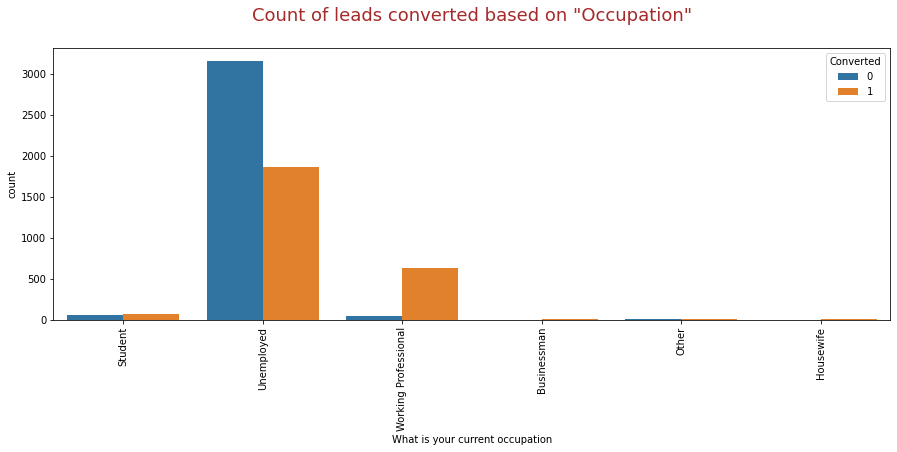

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Count of leads converted based on "Occupation"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
plt.show()

Inference:
- `Working Professional` are the most potential leads.
- Most leads are `Unemployed` but conversion rate is low.
- `Student` are equally likely converted and non-converted.

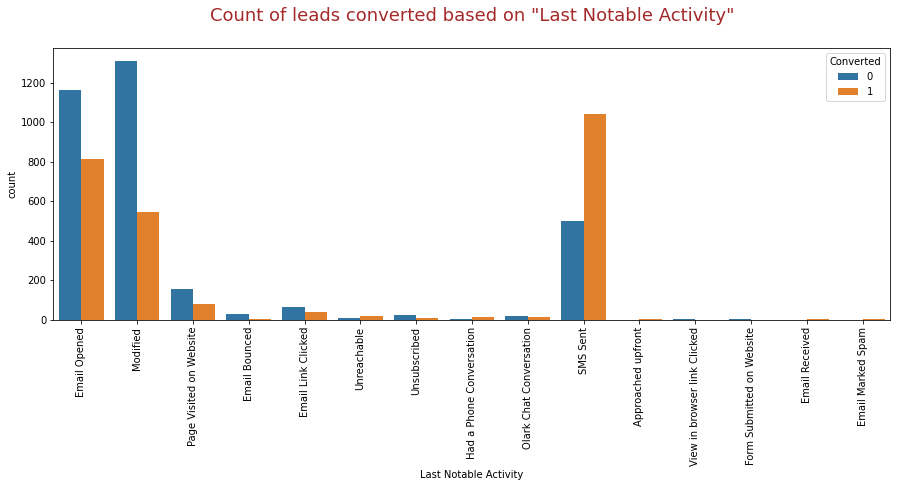

In [45]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Last Notable Activity'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Count of leads converted based on "Last Notable Activity"\n', fontdict={'fontsize':'18', 'fontweight':'5', 'color':'brown'})
plt.legend(loc='upper right', title='Converted')
plt.show()

Inference:
- It's seen that `Email Opened`, `Modified` & `SMS Sent` are most notable last activities performed.
- `SMS Sent` has highest conversion rate.
- Though not sure about `Modified` activity, still it has lowest conversion rate.

#### Pairplot of Numerical features

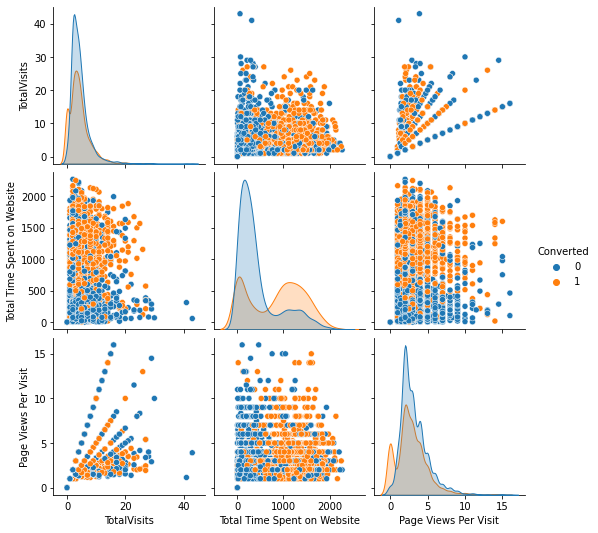

In [46]:
sns.pairplot(data=df.loc[:,['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']],
             hue='Converted')
plt.show()

#### Multicollinearity

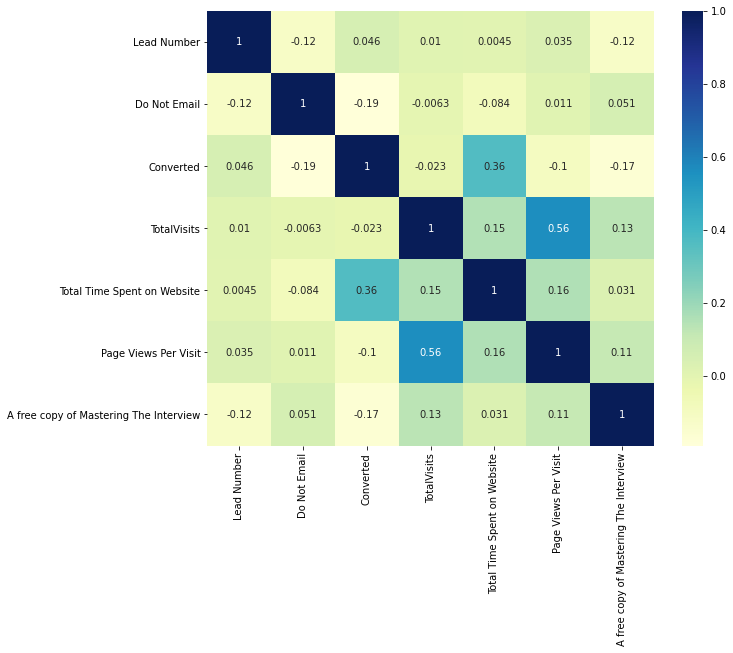

In [47]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Inference:
- No notable multicillinearity is evident from the heatmap.

In [48]:
conv_rate = (sum(df.Converted)/len(df.Converted))*100
conv_rate

44.16894664842681

We have **44 %** conversion rate

---

### Dummy Variable Creation

##### For modelling we will not be considering `Prospect ID`, `Lead Number`.

In [49]:
df = df.iloc[:, 2:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5848 entries, 2 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             5848 non-null   object 
 1   Lead Source                             5848 non-null   object 
 2   Do Not Email                            5848 non-null   int64  
 3   Converted                               5848 non-null   int64  
 4   TotalVisits                             5848 non-null   int64  
 5   Total Time Spent on Website             5848 non-null   int64  
 6   Page Views Per Visit                    5848 non-null   float64
 7   Last Activity                           5848 non-null   object 
 8   Specialization                          5848 non-null   object 
 9   What is your current occupation         5848 non-null   object 
 10  A free copy of Mastering The Interview  5848 non-null   int6

Dummies will be created for the following columns:
- `Lead Origin`, `Lead Source`,`Last Activity`, `Specialization`, `What is your current occupation`, `Last Notable Activity`

In [50]:
text_col = ["Lead Origin", "Lead Source","Last Activity", "Specialization", "What is your current occupation", 'Last Notable Activity']
dummies = pd.get_dummies(df[text_col], drop_first=True, dtype='int64') # creating dummies & cganging dtype to int
leads = pd.concat([df,dummies],axis=1).drop(text_col,axis=1).reset_index(drop = True) # concatenating with the cleaned data 
                                                                                      # & dropping the redundant columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          5848 non-null   int64  
 1   Converted                                             5848 non-null   int64  
 2   TotalVisits                                           5848 non-null   int64  
 3   Total Time Spent on Website                           5848 non-null   int64  
 4   Page Views Per Visit                                  5848 non-null   float64
 5   A free copy of Mastering The Interview                5848 non-null   int64  
 6   Lead Origin_Landing Page Submission                   5848 non-null   int64  
 7   Lead Origin_Lead Add Form                             5848 non-null   int64  
 8   Lead Origin_Lead Import                               5848

---

### Train test split

In [51]:
# Target Variable
y = leads['Converted']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Converted, dtype: int64

In [52]:
#Predictor Variable
X = leads.drop(['Converted'], axis=1)

# Spitting into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

---


### Feature Scaling

In [53]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4988,0,-0.352707,-0.225486,-0.012325,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3137,0,0.794397,-0.584263,0.231807,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2736,0,-0.065931,-1.073504,0.475940,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2608,0,-0.352707,-0.899551,-0.012325,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4916,0,-0.926259,-0.752779,-0.988857,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


---

---

## Model Building


### Feature Selection Using RFE

In [55]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)          
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 4),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 38),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 60),
 ('Lead Source_Welingak Website', False, 5),
 ('Lead Source_bing', False, 62),
 ('Lead Source_blog', False, 17),
 ('Lead Source_testone', False, 28),
 ('Lead Source_welearnblog_Home', Fa

In [58]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activ

### Using stats model we'll build our model
Steps:
1. Create model, view summary.
2. Analyse VIF measure of the amount of multicollinearity.
3. Eliminating variables will be done on following hierarchy:
    1. High p-value, High VIF.
    2. High-Low:
        - High p, Low VIF
        - Low p, High VIF
    3. Low p-value, Low VIF
4. Above steps will be performed recursively untill the variables in the model variables has significant p-value.

#### Model 1

In [59]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4093
Model:                            GLM   Df Residuals:                     4077
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1775.1
Date:                Tue, 07 Dec 2021   Deviance:                       3550.2
Time:                        13:35:43   Pearson chi2:                 4.50e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3920      0.308      4.524      0.000       0.789       1.995
Do Not Email                                            -1.6564      0.234     -7.077      0.000      -2.115      -1.198
Total Time Spent on Website                              1.0216      0.045     22.720      0.000       0.934       1.110
Lead Origin_Landing Page Submission                     -1.3641      0.130    -10.498      0.000      -1.619      -1.109
Lead Origin_Lead Add Form                                2.6357      0.284      9.290      0.000       2.080       3.192
Last Activity_Email Opened                               1.0120      0.194      5.215      0.000       0.632       1.392
Last Activity_SMS Sent                                   1.0903      0.135      8.048      0.000       0.825       1.356
Last Activity_Unsubscribed                               1.8945      0.534      3.551      0.000       0.849       2.940
What is your current occupation_Housewife               22.0780   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
What is your current occupation_Unemployed              -0.8882      0.265     -3.353      0.001      -1.407      -0.369
What is your current occupation_Working Professional     1.8504      0.333      5.553      0.000       1.197       2.504
Last Notable Activity_Email Opened                      -1.1644      0.219     -5.319      0.000      -1.593      -0.735
Last Notable Activity_Had a Phone Conversation           3.2075      1.091      2.941      0.003       1.070       5.345
Last Notable Activity_Modified                          -1.2325      0.134     -9.187      0.000      -1.495      -0.970
Last Notable Activity_Olark Chat Conversation           -1.0058      0.759     -1.326      0.185      -2.493       0.481
Last Notable Activity_Unreachable                        1.4649      0.725      2.021      0.043       0.044       2.886
========================================================================================================================
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,What is your current occupation_Unemployed,11.78
1,Last Notable Activity_Email Opened,9.60
2,Last Activity_Email Opened,8.57
3,Lead Origin_Landing Page Submission,7.31
4,Last Activity_SMS Sent,3.12
5,Last Notable Activity_Modified,2.88
6,What is your current occupation_Working Profes...,2.32
7,Lead Origin_Lead Add Form,1.64
8,Do Not Email,1.33
9,Last Activity_Unsubscribed,1.11


#### Model 2

In [61]:
X_train_rfe.pop('What is your current occupation_Housewife')

X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4093
Model:                            GLM   Df Residuals:                     4078
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1779.2
Date:                Tue, 07 Dec 2021   Deviance:                       3558.4
Time:                        13:35:43   Pearson chi2:                 4.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3958
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5588      0.301      5.177      0.000       0.969       2.149
Do Not Email                                            -1.6590      0.234     -7.093      0.000      -2.117      -1.201
Total Time Spent on Website                              1.0212      0.045     22.730      0.000       0.933       1.109
Lead Origin_Landing Page Submission                     -1.3573      0.130    -10.453      0.000      -1.612      -1.103
Lead Origin_Lead Add Form                                2.6410      0.284      9.314      0.000       2.085       3.197
Last Activity_Email Opened                               1.0135      0.193      5.243      0.000       0.635       1.392
Last Activity_SMS Sent                                   1.0884      0.135      8.038      0.000       0.823       1.354
Last Activity_Unsubscribed                               1.8961      0.533      3.555      0.000       0.851       2.941
What is your current occupation_Unemployed              -1.0613      0.256     -4.138      0.000      -1.564      -0.559
What is your current occupation_Working Professional     1.6776      0.327      5.138      0.000       1.038       2.318
Last Notable Activity_Email Opened                      -1.1654      0.218     -5.339      0.000      -1.593      -0.738
Last Notable Activity_Had a Phone Conversation           3.2075      1.091      2.941      0.003       1.070       5.345
Last Notable Activity_Modified                          -1.2289      0.134     -9.168      0.000      -1.492      -0.966
Last Notable Activity_Olark Chat Conversation           -1.0027      0.758     -1.322      0.186      -2.489       0.483
Last Notable Activity_Unreachable                        1.4664      0.725      2.023      0.043       0.046       2.887
========================================================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,What is your current occupation_Unemployed,11.53
1,Last Notable Activity_Email Opened,9.59
2,Last Activity_Email Opened,8.56
3,Lead Origin_Landing Page Submission,7.25
4,Last Activity_SMS Sent,3.11
5,Last Notable Activity_Modified,2.87
6,What is your current occupation_Working Profes...,2.29
7,Lead Origin_Lead Add Form,1.62
8,Do Not Email,1.33
9,Last Activity_Unsubscribed,1.11


#### Model 3

In [63]:
X_train_rfe.pop('What is your current occupation_Unemployed')

X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4093
Model:                            GLM   Df Residuals:                     4079
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1787.9
Date:                Tue, 07 Dec 2021   Deviance:                       3575.8
Time:                        13:35:43   Pearson chi2:                 4.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5404      0.172      3.147      0.002       0.204       0.877
Do Not Email                                            -1.6653      0.234     -7.119      0.000      -2.124      -1.207
Total Time Spent on Website                              1.0200      0.045     22.768      0.000       0.932       1.108
Lead Origin_Landing Page Submission                     -1.3684      0.129    -10.573      0.000      -1.622      -1.115
Lead Origin_Lead Add Form                                2.6811      0.283      9.479      0.000       2.127       3.236
Last Activity_Email Opened                               1.0320      0.193      5.341      0.000       0.653       1.411
Last Activity_SMS Sent                                   1.0674      0.135      7.914      0.000       0.803       1.332
Last Activity_Unsubscribed                               1.8707      0.533      3.510      0.000       0.826       2.915
What is your current occupation_Working Professional     2.7053      0.212     12.744      0.000       2.289       3.121
Last Notable Activity_Email Opened                      -1.1758      0.218     -5.393      0.000      -1.603      -0.748
Last Notable Activity_Had a Phone Conversation           3.1739      1.091      2.911      0.004       1.037       5.311
Last Notable Activity_Modified                          -1.2280      0.134     -9.185      0.000      -1.490      -0.966
Last Notable Activity_Olark Chat Conversation           -1.0386      0.758     -1.371      0.171      -2.524       0.447
Last Notable Activity_Unreachable                        1.4301      0.725      1.972      0.049       0.009       2.852
========================================================================================================================
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,Last Notable Activity_Email Opened,8.83
1,Last Activity_Email Opened,8.48
2,Lead Origin_Landing Page Submission,4.71
3,Last Activity_SMS Sent,2.24
4,Last Notable Activity_Modified,2.18
5,Lead Origin_Lead Add Form,1.49
6,Do Not Email,1.31
7,What is your current occupation_Working Profes...,1.26
8,Last Activity_Unsubscribed,1.10
9,Total Time Spent on Website,1.08


#### Model 4

In [65]:
X_train_rfe.pop('Last Notable Activity_Olark Chat Conversation')

X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4093
Model:                            GLM   Df Residuals:                     4080
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1788.9
Date:                Tue, 07 Dec 2021   Deviance:                       3577.8
Time:                        13:35:44   Pearson chi2:                 4.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4960      0.169      2.937      0.003       0.165       0.827
Do Not Email                                            -1.6565      0.234     -7.086      0.000      -2.115      -1.198
Total Time Spent on Website                              1.0198      0.045     22.764      0.000       0.932       1.108
Lead Origin_Landing Page Submission                     -1.3582      0.129    -10.519      0.000      -1.611      -1.105
Lead Origin_Lead Add Form                                2.6901      0.283      9.510      0.000       2.136       3.245
Last Activity_Email Opened                               1.0432      0.193      5.402      0.000       0.665       1.422
Last Activity_SMS Sent                                   1.0971      0.133      8.228      0.000       0.836       1.358
Last Activity_Unsubscribed                               1.8932      0.532      3.555      0.000       0.850       2.937
What is your current occupation_Working Professional     2.7066      0.212     12.741      0.000       2.290       3.123
Last Notable Activity_Email Opened                      -1.1516      0.217     -5.299      0.000      -1.578      -0.726
Last Notable Activity_Had a Phone Conversation           3.2090      1.090      2.944      0.003       1.072       5.346
Last Notable Activity_Modified                          -1.2037      0.133     -9.082      0.000      -1.463      -0.944
Last Notable Activity_Unreachable                        1.4668      0.724      2.025      0.043       0.047       2.887
========================================================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,Last Notable Activity_Email Opened,8.83
1,Last Activity_Email Opened,8.47
2,Lead Origin_Landing Page Submission,4.67
3,Last Activity_SMS Sent,2.22
4,Last Notable Activity_Modified,2.17
5,Lead Origin_Lead Add Form,1.48
6,Do Not Email,1.31
7,What is your current occupation_Working Profes...,1.26
8,Last Activity_Unsubscribed,1.10
9,Total Time Spent on Website,1.08


#### Model 5

In [67]:
X_train_rfe.pop('Last Notable Activity_Email Opened')

X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4093
Model:                            GLM   Df Residuals:                     4081
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1802.8
Date:                Tue, 07 Dec 2021   Deviance:                       3605.5
Time:                        13:35:44   Pearson chi2:                 4.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3888
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2204      0.161      1.370      0.171      -0.095       0.536
Do Not Email                                            -1.6356      0.232     -7.041      0.000      -2.091      -1.180
Total Time Spent on Website                              1.0210      0.045     22.903      0.000       0.934       1.108
Lead Origin_Landing Page Submission                     -1.3510      0.129    -10.502      0.000      -1.603      -1.099
Lead Origin_Lead Add Form                                2.7306      0.283      9.636      0.000       2.175       3.286
Last Activity_Email Opened                               0.2661      0.129      2.065      0.039       0.014       0.519
Last Activity_SMS Sent                                   1.2809      0.129      9.924      0.000       1.028       1.534
Last Activity_Unsubscribed                               2.0769      0.526      3.948      0.000       1.046       3.108
What is your current occupation_Working Professional     2.7231      0.212     12.819      0.000       2.307       3.139
Last Notable Activity_Had a Phone Conversation           3.4788      1.089      3.194      0.001       1.344       5.613
Last Notable Activity_Modified                          -0.7963      0.107     -7.456      0.000      -1.006      -0.587
Last Notable Activity_Unreachable                        1.7357      0.723      2.402      0.016       0.319       3.152
========================================================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,Lead Origin_Landing Page Submission,4.25
1,Last Activity_Email Opened,2.37
2,Last Activity_SMS Sent,2.17
3,Last Notable Activity_Modified,1.60
4,Lead Origin_Lead Add Form,1.46
5,Do Not Email,1.30
6,What is your current occupation_Working Profes...,1.25
7,Last Activity_Unsubscribed,1.10
8,Total Time Spent on Website,1.07
9,Last Notable Activity_Had a Phone Conversation,1.01


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this final model. 

In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4988    0.204103
3137    0.074229
2736    0.149044
2608    0.875976
4916    0.063238
5751    0.290638
2298    0.230788
2004    0.058890
3764    0.909708
5287    0.042126
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20410299, 0.07422895, 0.14904434, 0.87597577, 0.06323774,
       0.29063788, 0.23078791, 0.05889045, 0.90970783, 0.04212567])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [71]:
y_train_pred_final = pd.DataFrame({'Lead_id': y_train.index, 'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Lead_id,Converted,Convert_Prob
0,4988,0,0.204103
1,3137,0,0.074229
2,2736,0,0.149044
3,2608,1,0.875976
4,4916,0,0.063238


In [72]:
y_train_pred_final['predicted'] = y_train_pred_final['Convert_Prob'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Lead_id,Converted,Convert_Prob,predicted
0,4988,0,0.204103,0
1,3137,0,0.074229,0
2,2736,0,0.149044,0
3,2608,1,0.875976,1
4,4916,0,0.063238,0


---

### Model Evaluation

We'll now evaluate out model on train data.

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1959  321]
 [ 498 1315]]


In [74]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7999022721720009


In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7253171538885824

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.8592105263157894

Taking cutt-off as 0.5 we obtain:
- **Accuracy** - 80%
- **Sensitivity** - 75%
- **Specificity** - 86%%

---

### Optimising Cutt-Off ( AUC- ROC curve )

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

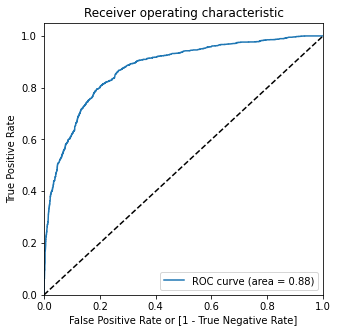

In [80]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_id,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4988,0,0.204103,0,1,1,1,0,0,0,0,0,0,0
1,3137,0,0.074229,0,1,0,0,0,0,0,0,0,0,0
2,2736,0,0.149044,0,1,1,0,0,0,0,0,0,0,0
3,2608,1,0.875976,1,1,1,1,1,1,1,1,1,1,0
4,4916,0,0.063238,0,1,0,0,0,0,0,0,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.442951  1.000000  0.000000
0.1   0.1  0.573662  0.976834  0.253070
0.2   0.2  0.719277  0.927192  0.553947
0.3   0.3  0.782067  0.886928  0.698684
0.4   0.4  0.800635  0.801434  0.800000
0.5   0.5  0.799902  0.725317  0.859211
0.6   0.6  0.777669  0.634308  0.891667
0.7   0.7  0.763743  0.553778  0.930702
0.8   0.8  0.731004  0.435742  0.965789
0.9   0.9  0.671146  0.274131  0.986842


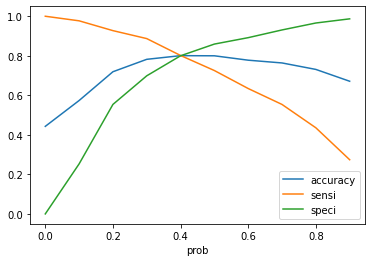

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From above statistics & plots it's clear that 0.4 is the optimum threshold for our model.<br>
Hence, we will be finalising **0.4** as optimum threshold.

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x >= 0.4 else 0)

y_train_pred_final.head()

,Lead_id,Converted,Convert_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,4988,0,0.204103,0,1,1,1,0,0,0,0,0,0,0,0
1,3137,0,0.074229,0,1,0,0,0,0,0,0,0,0,0,0
2,2736,0,0.149044,0,1,1,0,0,0,0,0,0,0,0,0
3,2608,1,0.875976,1,1,1,1,1,1,1,1,1,1,0,1
4,4916,0,0.063238,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_train_pred_final[['Lead_id', 'Converted', 'Convert_Prob', 'final_predicted', 'Lead_Score']].head()

,Lead_id,Converted,Convert_Prob,final_predicted,Lead_Score
0,4988,0,0.204103,0,20
1,3137,0,0.074229,0,7
2,2736,0,0.149044,0,15
3,2608,1,0.875976,1,88
4,4916,0,0.063238,0,6


#### Checking metrics based on the finalised threshold

In [86]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8006352308819936


In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1824,  456],
       [ 360, 1453]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8014340871483728

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8

**Observation** :

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is acceptable. We have the following values for the Train Data:

- **Accuracy** : 80%
- **Sensitivity** : 80%
- **Specificity** : 80%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [91]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2


In [92]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7611314824515453


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8351648351648352


In [94]:
print("Classification Report: \n\n",classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      2280
           1       0.76      0.80      0.78      1813

    accuracy                           0.80      4093
   macro avg       0.80      0.80      0.80      4093
weighted avg       0.80      0.80      0.80      4093



In [95]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

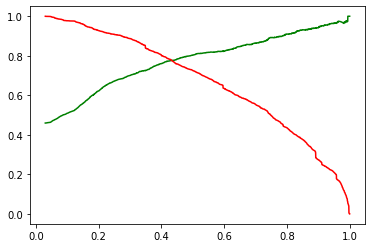

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

---

## Predictions on Test data

### Scaling test data numerical columns

In [97]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [98]:
col = X_train_rfe.columns
len(col)

11

In [99]:
X_test = X_test[col]
X_test.shape

(1755, 11)

In [100]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# Check X_test_sm

X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Opened,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
1788,1.0,0,-1.053572,1,0,1,0,0,0,0,0,0
2851,1.0,0,-0.524467,1,0,0,1,0,0,0,0,0
1841,1.0,1,-1.055384,1,0,1,0,0,0,0,0,0
4700,1.0,0,-0.991964,1,0,0,1,0,0,0,0,0
1224,1.0,0,-0.941228,1,0,0,0,0,0,0,1,0


### Predictions on Test set

In [101]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1788    0.125627
2851    0.404866
1841    0.027183
4700    0.296807
1224    0.052753
1996    0.139441
5423    0.924455
2858    0.103910
2236    0.444165
5106    0.623985
dtype: float64

In [102]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame({'convert_prob':y_test_pred})
y_pred_1.head()

,convert_prob
1788,0.125627
2851,0.404866
1841,0.027183
4700,0.296807
1224,0.052753


In [103]:
# Converting y_test actual to dataframe

y_test_df = pd.DataFrame({'Lead_id':y_test.index, 'converted':y_test})

In [104]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'
y_pred_final.head()

,Lead_id,converted,convert_prob
0,1788,0,0.125627
1,2851,1,0.404866
2,1841,0,0.027183
3,4700,0,0.296807
4,1224,0,0.052753


In [105]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.convert_prob.map(lambda x: 1 if x >= 0.4 else 0)

In [106]:
# Check y_pred_final

y_pred_final.head()

,Lead_id,converted,convert_prob,final_predicted
0,1788,0,0.125627,0
1,2851,1,0.404866,1
2,1841,0,0.027183,0
3,4700,0,0.296807,0
4,1224,0,0.052753,0


In [107]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['converted'], y_pred_final.final_predicted)

0.7982905982905983

In [108]:
confusion_test = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion_test

array([[781, 204],
       [150, 620]], dtype=int64)

In [109]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [110]:
# Calculate sensitivity
TP / float(TP+FN)

0.8051948051948052

In [111]:
# Calculate specificity
TN / float(TN+FP)

0.7928934010152284

In [112]:
print(classification_report(y_pred_final['converted'], y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       985
           1       0.75      0.81      0.78       770

    accuracy                           0.80      1755
   macro avg       0.80      0.80      0.80      1755
weighted avg       0.80      0.80      0.80      1755



**Observation**:

After running the model on the Test Data these are the figures we obtain:

- **Accuracy** : 80%
- **Sensitivity** : 80.52%
- **Specificity** : 72.29%

## **Final Observation**

Let us compare the values obtained for Train & Test:

**Train Data**:<br>
- **Accuracy** : 80%
- **Sensitivity** : 80%
- **Specificity** : 80%

**Test Data**:<br>
- **Accuracy** : 80%
- **Sensitivity** : 80.52%
- **Specificity** : 72.29%

The following are variables in descending order of importance which influence our business problem and model:<br>
    
           1. Last Notable Activity             - Had a Phone Conversation
           2. Lead Origin                       - Lead Add Form
           3. What is your current occupation   - Working Professional
           4. Last Activity                     - Unsubscribed
           5. Last Notable Activity             - Unreachable	
           6. Do Not Email	
           7. Lead Origin                       - Landing Page Submission	
           8. Last Activity                     - SMS Sent	
           9. Total Time Spent on Website	
           10. Last Notable Activity            - Modified	
           11. Last Activity                    - Email Opened

## Model Explanation
Logistic regression uses a sigmoid function to predict the output. The sigmoid function returns a value from 0 to 1. Generally, we take a threshold such as 0.5. If the sigmoid function returns a value greater than or equal to 0.5, we take it as 1, and if the sigmoid function returns a value less than 0.5, we take it as 0.
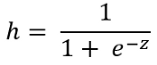

z is the input features multiplied by a randomly initialized value denoted as theta.
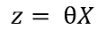

Here, X is the input feature. In most cases, there are several input features. So, this formula becomes big:
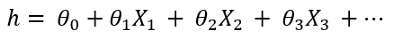

In our case, the variables from the final model will take place instead of X1, X2, X3, ..., X11 with their respective co-efficients.